In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point, Polygon
import statistics



#reading data from the csv file
data1 = pd.read_csv("COVID19_line_list_data.csv")
data2 = pd.read_csv("time_series_covid_19_confirmed.csv")


ModuleNotFoundError: No module named 'geopandas'

In [28]:
data2.head

<bound method NDFrame.head of     Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
0              NaN          Thailand  15.0000  101.0000        2        3   
1              NaN             Japan  36.0000  138.0000        2        1   
2              NaN         Singapore   1.2833  103.8333        0        1   
3              NaN             Nepal  28.1667   84.2500        0        0   
4              NaN          Malaysia   2.5000  112.5000        0        0   
..             ...               ...      ...       ...      ...      ...   
472   Sint Maarten       Netherlands  18.0425  -63.0548        0        0   
473            NaN             Niger  17.6078    8.0817        0        0   
474            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
475    Isle of Man    United Kingdom  54.2361   -4.5481        0        0   
476            NaN          Zimbabwe -20.0000   30.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ... 

In [207]:
data2.loc[data2['Province/State'] == 'Hubei','2/13/20']

154    48206
Name: 2/13/20, dtype: int64

In [193]:
chinaData=data2.loc[data2['Country/Region'] =='China']

In [148]:
chinaTotalByDate = chinaData.groupby(["Country/Region"]).sum()


In [186]:
chinaTotalByDate

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,6087,...,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250


In [147]:
dateData = np.array(list(data2.columns[4:]))
data2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20'],
      dtype='object')

In [184]:
chinaDailyCountSmoothed = np.hstack([np.repeat(chinaDailyCount[0],6),chinaDailyCount,np.repeat(chinaDailyCount[-1],6)])
print(chinaDailyCountSmoothed)
chinaDailyCountSmoothed = [statistics.mean(chinaDailyCountSmoothed[i-6:i]) for i in range(6,len(chinaDailyCountSmoothed)-6)]

[  548   548   548   548   548   548   548   643   920  1406  2075  2877
  5509  6087  8141  9802 11891 16630 19716 23707 27440 30587 34110 36814
 39829 42354 44386 44759 59895 66358 68413 70513 72434 74211 74619 75077
 75550 77001 77022 77241 77754 78166 78600 78928 79356 79932 80136 80261
 80386 80537 80690 80770 80823 80860 80887 80921 80932 80945 80977 81003
 81033 81058 81102 81156 81250 81250 81250 81250 81250 81250 81250]


[  548   643   920  1406  2075  2877  5509  6087  8141  9802 11891 16630
 19716 23707 27440 30587 34110 36814 39829 42354 44386 44759 59895 66358
 68413 70513 72434 74211 74619 75077 75550 77001 77022 77241 77754 78166
 78600 78928 79356 79932 80136 80261 80386 80537 80690 80770 80823 80860
 80887 80921 80932 80945 80977 81003 81033 81058 81102 81156 81250]


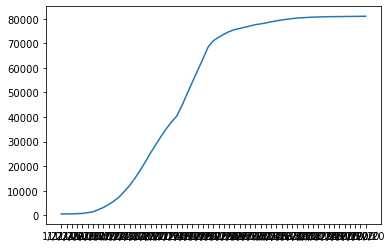

In [185]:
chinaDailyCount = chinaTotalByDate[dateData].to_numpy().reshape(len(dataDate))
print(chinaDailyCount)
plt.plot(dateData, chinaDailyCountSmoothed)


2